# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print data.shape

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
(440, 6)


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print data.columns.values

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']


****************************************
****************************************
****************************************
****************************************
****************************************
****************************************


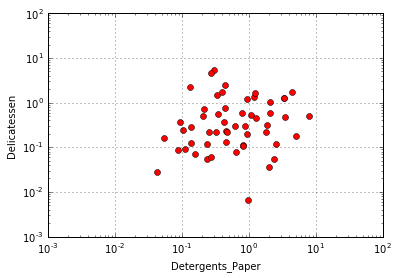

In [12]:
import itertools
for a, b in itertools.combinations(range(data.shape[1]), 2):
    plt.clf()
    plt.xlabel(data.columns.values[a])
    plt.ylabel(data.columns.values[b])
    plt.loglog(scaled_data.T[a], scaled_data.T[b], 'ro')
    plt.xlim([10**-3,10**2])
    plt.ylim([10**-3,10**2])
    #plt.plot(scaled_data.T[a], scaled_data.T[b], 'ro')
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    #plt.show()    

def print_data_info(array):
    print 'Min     :%12.3f' % np.min(array)
    print 'Max     :%12.3f' % np.max(array)
    print 'Mean    :%12.3f' % np.mean(array)
    print 'Median  :%12.3f' % np.median(array)
    print 'Std     :%12.3f' % np.std(array, ddof=1) #ddof is for sample data
    print 'Var     :%12.3f' % np.var(array, ddof=1) #ddof is for sample data    
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

for a in scaled_data.T:
    #print data
    print '*' * 40
    #print 'Feature :%12s' % a
    #print_data_info(a)
    

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: I think the computations will show certain features have larger variance than others. Due to different shop types and sizes we will be able to recognize supermarkets from smaller stores.



### PCA

In [8]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
# we need to scale this data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

# Print the components and the amount of variance in the data contained in each dimension
print data.columns.values
print pca.components_
print pca.explained_variance_ratio_

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


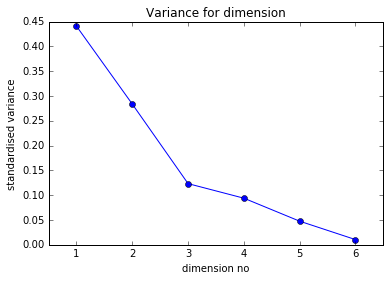

In [9]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, '-o')
plt.xlabel('dimension no')
plt.ylabel('standardised variance')
plt.title('Variance for dimension')
plt.xlim(xmin=0.5, xmax=6.5)
plt.grid = True
plt.show()

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The largest variance starts at .52 and approximately halves with each additional dimension. From the PCA analysis results I would choose the first 3 features to use. This is because 4 or more dimensions adds little information, and using 2 or less leaves would leave the data literaly flat. I would hope that the 3rd dimension would show a number of clusters that 2 dimensions would not.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: From the components printout of PCA we can disern the following summary of dimensions.
- The first dimension shows a strong correlation with the Milk, Grocery and Detergents spending
- The second dimension is strongly and negatively aligned with the Fresh spending, i.e. shops that don't spend money on Fresh.
- The third dimension correlates Fresh and negative Frozen spending, i.e. Shops that spend on Fresh, and Don't spend on Frozen.
- The forth dimension correlates Milk and Frozen, but not Fresh
- The fifth dimension is aligned with Delicatessen
- And the sixth is a correlation of Grocery and Detergents

We can use this information to consider what kinds of shops we might have in the real world and determine the number of clusters we should choose.

### ICA

In [10]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(scaled_data)

# Print the independent components
print data.columns.values
print ica.components_

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[-0.00488288 -0.0016185  -0.00569296 -0.00253169  0.00242528  0.05096393]
 [ 0.01092895  0.00103733 -0.00734548 -0.05404988  0.00263666  0.01676617]
 [-0.00376665  0.01709914  0.11417475 -0.00710221 -0.1343003  -0.01613873]
 [-0.05022962  0.00634471  0.00601034  0.00328136 -0.00990704  0.0029256 ]
 [-0.0019445  -0.0725691   0.0551918   0.00176063 -0.01585173  0.01705723]
 [ 0.00264902 -0.01384075  0.06151192  0.00196037 -0.00443435 -0.0041686 ]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: From the components printout of PCA we can disern the following summary of dimensions.
- The first component shows a negative correlation for Milk spending
- The second component shows strong correlation for Delicatessen
- The third component shows a strong negative correlation for Frozen
- The forth dimenstion shows a strong correlation for Grocery and a slight negative for milk
- The fifth dimension shows ver strong correlation for Grocery and strong for not detergents
- The sixth dimension shows a strong correlation for Delicatessen and slight for Fresh

Some of these could indicate client types. Like vector six might be restaurants.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [42]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]
[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]]
(2, 6)


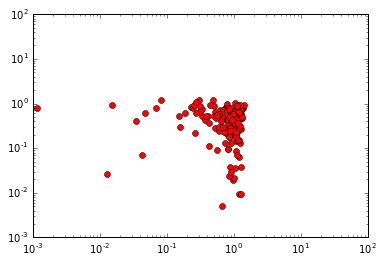

In [21]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
print reduced_data[:10]  # print upto 10 elements

print pca.components_
print pca.components_.shape

def show_plot(a, b):
    plt.clf()
    #plt.plot(a, b, 'ro')
    plt.loglog(a, b, 'ro')
    plt.xlim([10**-3,10**2])
    plt.ylim([10**-3,10**2])
    plt.show()
    
#show_plot(pca.components_[0], pca.components_[1])
show_plot(reduced_data.T[0], reduced_data.T[1])
#for a in range(reduced_data.shape[1]):
#    show_plot(reduced_data.T[a])
reduced_data = pca.components_

In [131]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = KMeans(n_clusters=4)


#clusters = GMM(n_components=4)
clusters.fit(reduced_data.T)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [132]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [133]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[-0.06154039  0.76460638]
 [-0.11023466  0.01917788]
 [-0.97653685 -0.11061386]
 [-0.05706495  0.44057646]]


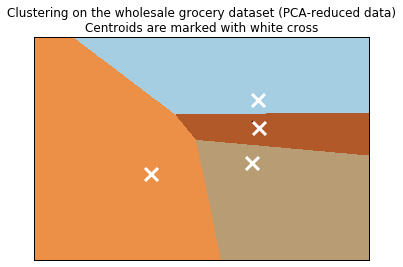

In [134]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 